In [ ]:

from google.colab import files
uploaded = files.upload()

Saving deceptiondocword.csv to deceptiondocword.csv
Saving deceptionword.csv to deceptionword.csv
Saving mostfreq1000docword.csv to mostfreq1000docword.csv
Saving mostfreq1000word.csv to mostfreq1000word.csv
Saving speeches.csv to speeches.csv
Saving winners.csv to winners.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import codecs

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading Data**


In [ ]:
deceptiondocword = pd.read_csv("deceptiondocword.csv")
deceptionword = pd.read_csv("deceptionword.csv", header=None)
mostFreqMatrixWord = pd.read_csv("mostfreq1000docword.csv")
mostFreqWord = pd.read_csv("mostfreq1000word.csv", encoding= 'unicode_escape', header=None)
speeches= pd.read_csv("speeches.csv")
winner = pd.read_csv("winners.csv")

# **Data Manipulation**

First I will reconfigure the datset in two dataframes. Each Dataframe will be have x labeled collumns containing multiple values. 


Changing MostFreqWord and Deception Word Dataframe into a list of strings,

In [ ]:
Temp = mostFreqWord.values.tolist()
mostFreqWordList = []
for x in Temp:
  mostFreqWordList.append(x[0])
print("Most Frequent Words: ", mostFreqWordList)

Temp2 = deceptionword.values.tolist()
deceptionwordList = []
for y in Temp2:
  deceptionwordList.append(y[0])
print("Deception Words: ", deceptionwordList)

Most Frequent Words:  ['the_AT', 'and_CC', 'to_TO', 'of_IN', 'a_AT', 'in_IN', 'we_PPSS', 'i_PPSS', 'for_IN', 'is_BEZ', 'our_PP$', 'to_IN', 'that_CS', 'this_DT', 'have_HV', 'are_BER', 'will_MD', 'you_PPSS', 'on_IN', 'that_WPS', 'but_CC', 'be_BE', 'with_IN', 'they_PPSS', 'it_PPS', 'who_WPS', 'people_NNS', 'all_ABN', 'their_PP$', 'as_CS', 'you_PPO', 'can_MD', 'what_WDT', 'that_DT', 'it_PPO', 'do_DO', 'or_CC', 'america_NP', 'when_WRB', 'by_IN', "that's_DT", 'if_CS', 'from_IN', 'your_PP$', 'my_PP$', 'was_BEDZ', 'make_VB', 'at_IN', 'president_NN', 'he_PPS', 'has_HVZ', 'country_NN', 'now_RB', 'going_VBG', 'us_PPO', 'because_CS', 'more_AP', "it's_PPS", 'just_RB', 'american_JJ', 'new_JJ', 'an_AT', 'years_NNS', 'about_IN', 'want_VB', 'here_RB', 'jobs_NNS', 'up_RP', 'know_VB', 'them_PPO', 'time_NN', 'me_PPO', 'need_VB', 'tax_NN', 'every_AT', "we're_PPSS", 'been_BEN', 'get_VB', 'one_CD', 'than_CS', "i'm_PPSS", 'those_DTS', 'out_RP', "don't_DO", 'americans_NPS', 'economy_NN', 'some_DTI', "we've_PPS

In [ ]:
mostFreqMatrixWord.head
# The Matrix is in the format of 430 x 1000 

<bound method NDFrame.head of      0.047838  0.037313  0.021814  ...     0.395  0.396  0.00019135.197
0    0.040797  0.031784  0.023482  ...  0.000237    0.0        0.000000
1    0.037022  0.033041  0.016919  ...  0.000000    0.0        0.000398
2    0.053289  0.037926  0.018243  ...  0.000480    0.0        0.000000
3    0.051535  0.029605  0.012061  ...  0.000000    0.0        0.000000
4    0.049890  0.029156  0.027472  ...  0.000389    0.0        0.000000
..        ...       ...       ...  ...       ...    ...             ...
425  0.049268  0.039281  0.017643  ...  0.000000    0.0        0.000000
426  0.042038  0.026396  0.022485  ...  0.000000    0.0        0.000000
427  0.036674  0.026976  0.026530  ...  0.000000    0.0        0.000000
428  0.041244  0.031104  0.028569  ...  0.000000    0.0        0.000293
429  0.051724  0.053050  0.022546  ...  0.000000    0.0        0.000000

[430 rows x 1000 columns]>

**Final Frequent Word Data Frame**

Concatinating Frequent Word Labels and Frequent Word Matrix into
a single dataframe. 




In [ ]:

mostFreqMatrixWord.columns = mostFreqWordList
df1 = mostFreqMatrixWord
df1.head

<bound method NDFrame.head of        the_AT    and_CC     to_TO  ...  areas_NNS  outstanding_JJ  streets_NNS
0    0.040797  0.031784  0.023482  ...   0.000237             0.0     0.000000
1    0.037022  0.033041  0.016919  ...   0.000000             0.0     0.000398
2    0.053289  0.037926  0.018243  ...   0.000480             0.0     0.000000
3    0.051535  0.029605  0.012061  ...   0.000000             0.0     0.000000
4    0.049890  0.029156  0.027472  ...   0.000389             0.0     0.000000
..        ...       ...       ...  ...        ...             ...          ...
425  0.049268  0.039281  0.017643  ...   0.000000             0.0     0.000000
426  0.042038  0.026396  0.022485  ...   0.000000             0.0     0.000000
427  0.036674  0.026976  0.026530  ...   0.000000             0.0     0.000000
428  0.041244  0.031104  0.028569  ...   0.000000             0.0     0.000293
429  0.051724  0.053050  0.022546  ...   0.000000             0.0     0.000000

[430 rows x 1000 colu

Next I will add the win loss data, and speech data frame to the Data Frame

In [ ]:
df1

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,promised_VBD,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000398,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.000000,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000000,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.00013

In [ ]:

temp = df1
temp['Win/Loss'] = winner
df1withWinLoss = temp
df1withWinLoss
#mostFreq1000WordFixed['Speech'] = speeches
#mostFreq1000WordFixedt

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.000130,0.000000,0.000000,0.000259,0.000000,0.0

Target Dataframe

In [ ]:
tempSpeech = pd.read_csv("speeches.csv")
tempWin = pd.read_csv("winners.csv")
tempWin.shape
TargetDf = tempSpeech 
TargetDf['Win/Loss'] = tempWin
TargetDf.head()
TargetDf.shape

(430, 2)

Next I will create Dataframe for Deception Words 

In [ ]:
deceptiondocword

,21,19,11,9,7,6,1,7.1,2,5,2.1,0,3,2.2,0.1,1.1,0.2,0.3,0.4,0.5,0.6,0.7,2.3,2.4,2.5,0.8,0.9,0.10,1.2,0.11,0.12,0.13,2.6,0.14,1.3,0.15,0.16,1.4,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
deceptiondocword.columns = deceptionwordList
deceptiondocword

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next I will add win loss and speech columns in to the dataframe

In [ ]:
df2 = deceptiondocword
df2

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
deceptiondocword['Win/Loss'] = winner
df2WithWinLoss = deceptiondocword
#deceptiondocword['Speech'] = speeches
#deceptiondocword = deceptiondocword.drop(['Speech'], axis=1)
df2WithWinLoss

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish,Win/Loss
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Spliting Data


In [ ]:
df1.head

<bound method NDFrame.head of        the_AT    and_CC     to_TO  ...  outstanding_JJ  streets_NNS  Win/Loss
0    0.040797  0.031784  0.023482  ...             0.0     0.000000         1
1    0.037022  0.033041  0.016919  ...             0.0     0.000398         1
2    0.053289  0.037926  0.018243  ...             0.0     0.000000         1
3    0.051535  0.029605  0.012061  ...             0.0     0.000000         1
4    0.049890  0.029156  0.027472  ...             0.0     0.000000         1
..        ...       ...       ...  ...             ...          ...       ...
425  0.049268  0.039281  0.017643  ...             0.0     0.000000         0
426  0.042038  0.026396  0.022485  ...             0.0     0.000000         0
427  0.036674  0.026976  0.026530  ...             0.0     0.000000         0
428  0.041244  0.031104  0.028569  ...             0.0     0.000293         0
429  0.051724  0.053050  0.022546  ...             0.0     0.000000         0

[430 rows x 1001 columns]>

**Statistics**

In [ ]:
df1.describe

<bound method NDFrame.describe of        the_AT    and_CC     to_TO  ...  outstanding_JJ  streets_NNS  Win/Loss
0    0.040797  0.031784  0.023482  ...             0.0     0.000000         1
1    0.037022  0.033041  0.016919  ...             0.0     0.000398         1
2    0.053289  0.037926  0.018243  ...             0.0     0.000000         1
3    0.051535  0.029605  0.012061  ...             0.0     0.000000         1
4    0.049890  0.029156  0.027472  ...             0.0     0.000000         1
..        ...       ...       ...  ...             ...          ...       ...
425  0.049268  0.039281  0.017643  ...             0.0     0.000000         0
426  0.042038  0.026396  0.022485  ...             0.0     0.000000         0
427  0.036674  0.026976  0.026530  ...             0.0     0.000000         0
428  0.041244  0.031104  0.028569  ...             0.0     0.000293         0
429  0.051724  0.053050  0.022546  ...             0.0     0.000000         0

[430 rows x 1001 columns]>

# **Training & Test Split**

## Most Freq Words

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
print(train)

       the_AT    and_CC     to_TO  ...  outstanding_JJ  streets_NNS  Win/Loss
155  0.031870  0.035528  0.024556  ...        0.000000     0.000000         0
187  0.041451  0.036917  0.014896  ...        0.000000     0.000000         0
174  0.032160  0.029733  0.030947  ...        0.000000     0.000000         0
238  0.045133  0.028864  0.015482  ...        0.000000     0.000000         1
21   0.042775  0.033719  0.026782  ...        0.000000     0.000193         1
..        ...       ...       ...  ...             ...          ...       ...
399  0.033506  0.026500  0.021017  ...        0.000305     0.000000         1
223  0.043006  0.051357  0.009603  ...        0.000000     0.000835         1
10   0.045290  0.031779  0.026641  ...        0.000000     0.000000         1
91   0.047127  0.025242  0.028464  ...        0.000000     0.000000         1
58   0.041221  0.038307  0.015684  ...        0.000000     0.000139         1

[344 rows x 1001 columns]


## Deception Words

In [ ]:
from sklearn.model_selection import train_test_split
trainDeception, testDeception = train_test_split(df2WithWinLoss, test_size=0.2)
print(trainDeception)

      i  but  or  my  going  ...  inferior  boring  dislike  anguish  Win/Loss
102  18    8   5   3      3  ...         0       0        0        0         0
359  78   35  15  22     26  ...         0       0        0        0         1
10   94   28  11   5     12  ...         0       0        0        0         1
269  26   12   2   3      1  ...         0       0        0        0         1
13   34   25   6   2      1  ...         0       0        0        0         1
..   ..  ...  ..  ..    ...  ...       ...     ...      ...      ...       ...
107  95   24   8  31      4  ...         0       0        0        0         0
387  46   17  27   6     13  ...         0       0        0        0         1
43   49   15  10   6      3  ...         0       0        0        0         0
73   11   12   5   3      0  ...         0       0        0        0         1
108  26    9   8  12      4  ...         0       0        0        0         0

[344 rows x 77 columns]


# **Data Visualization**

In [ ]:
deceptiondocword

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish,Win/Loss
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Figure size 2592x432 with 0 Axes>

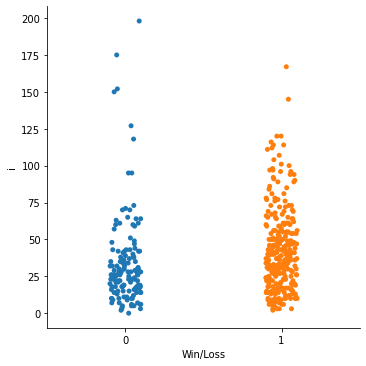

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the width and height of the figure
plt.figure(figsize=(36,6))

# Visualizin the data on how often a president uses I in their speech.
sns.catplot(x="Win/Loss", y="i", data=deceptiondocword)

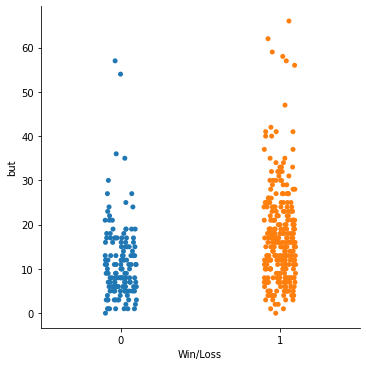

In [ ]:

# Visualizin the data on how often a president using 'but' in their speech.
sns.catplot(x="Win/Loss", y="but", data=deceptiondocword)

## Deception Words
Part 2

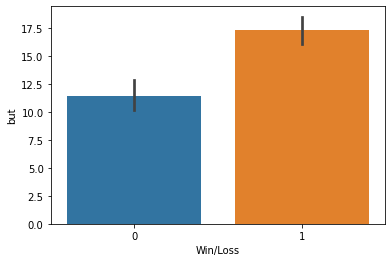

In [ ]:
# Visualizin the data on how often a president using 'but' in their speech.
sns.barplot(x="Win/Loss", y="but", data=deceptiondocword)

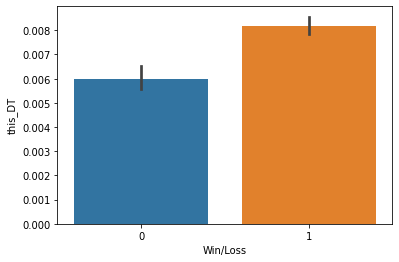

In [ ]:
# Visualizin the data on how often a president using 'but' in their speech.
sns.barplot(x="Win/Loss", y="this_DT", data=df1)

In [ ]:
df1.describe()

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,0.041768,0.032741,0.022074,0.022118,0.017503,0.016278,0.014174,0.011725,0.010445,0.009109,0.009166,0.008706,0.008156,0.007469,0.006495,0.005780,0.006203,0.004894,0.005319,0.004826,0.004552,0.004600,0.004525,0.004091,0.004100,0.003950,0.003518,0.003736,0.003650,0.003679,0.003441,0.003398,0.003258,0.003195,0.003024,0.002934,0.003064,0.003073,0.002969,0.002989,...,0.000112,0.000116,0.000106,0.000088,0.000095,0.000114,0.000100,0.000087,0.000108,0.000109,0.000122,0.000114,0.000088,0.000085,0.000137,0.000107,0.000110,0.000102,0.000101,0.000109,0.000117,0.000109,0.000129,0.000112,0.000101,0.000092,0.000122,0.000097,0.000109,0.000124,0.000083,0.000089,0.000125,0.000102,0.000114,0.000082,0.000109,0.000105,0.000097,0.669767
std,0.008216,0.005965,0.005506,0.006502,0.003510,0.003586,0.005455,0.005307,0.003146,0.003047,0.004458,0.002993,0.003486,0.003346,0.002565,0.002261,0.004477,0.003634,0.002011,0.002266,0.001713,0.002242,0.001978,0.002271,0.002025,0.002075,0.002394,0.001790,0.002075,0.001953,0.002763,0.002067,0.002040,0.001463,0.001761,0.001752,0.001897,0.001888,0.001631,0.001451,...,0.000270,0.000310,0.000285,0.000190,0.000198,0.000463,0.000258,0.000192,0.000300,0.000247,0.000387,0.000423,0.000198,0.000352,0.000572,0.000238,0.000396,0.000227,0.000230,0.000237,0.000313,0.000366,0.000455,0.000396,0.000247,0.000209,0.000413,0.000312,0.000253,0.000407,0.000238,0.000212,0.000281,0.000256,0.000300,0.000266,0.000304,0.000351,0.000252,0.470845
min,0.017045,0.014831,0.004870,0.009006,0.005682,0.000000,0.000000,0.000000,0.002571,0.002492,0.000960,0.002584,0.000607,0.000000,0.001131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036271,0.028693,0.018647,0.017153,0.015196,0.013884,0.009965,0.008219,0.008402,0.007043,0.006023,0.006701,0.005670,0.005398,0.004693,0.004283,0.002699,0.001926,0.0042

# Feature Engineering

DataFrame Loading

In [ ]:
df = df1.iloc[:, train.columns != 'Win/Loss']
target = df1['Win/Loss']

**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The example belo uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

#apply SelectKBest class to extract top 10 or 100 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

             Specs     Score
322       obama_NP  0.305125
40       that's_DT  0.242691
87      we've_PPSS  0.138755
16         will_MD  0.125872
88         got_VBD  0.125620
..             ...       ...
603     others_NNS  0.020028
30         you_PPO  0.019907
242       after_IN  0.019821
680  investing_VBG  0.019732
135       can't_MD  0.019681

[100 rows x 2 columns]


## Most Freq Words Optimized

In [ ]:
featureScores.sort_index

<bound method DataFrame.sort_index of               Specs     Score
0            the_AT  0.060739
1            and_CC  0.023443
2             to_TO  0.010397
3             of_IN  0.080377
4              a_AT  0.000066
..              ...       ...
995         led_VBD  0.006453
996    september_NP  0.001515
997       areas_NNS  0.000092
998  outstanding_JJ  0.012910
999     streets_NNS  0.004323

[1000 rows x 2 columns]>

**Heat Map**

In [ ]:
df1

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000,1
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398,1
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000,1
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.000130,0.000000,0.000000,0.000259,0.000000,0.0

#Principal Component Analysis


**Standardize the Data**

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler


# Standardizing the features
StandardizedData = StandardScaler().fit_transform(mostFreqMatrixWord)
#type(StandardizedData)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(StandardizedData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
# Check the if Win/Loss Attribute is fitted in the right order 
finalDf = pd.concat([principalDf, df1[['Win/Loss']]], axis = 1)
finalDf

,principal component 1,principal component 2,Win/Loss
0,-6.835762,-4.436498,1
1,1.164918,-2.684238,1
2,12.453967,1.208096,1
3,14.278010,-0.910511,1
4,2.123071,2.191058,1
...,...,...,...
425,6.963248,-3.396128,0
426,-5.604884,-2.559798,0
427,-4.454068,-3.373742,0
428,2.625402,-5.614269,0


**Visualize 2D Projection**

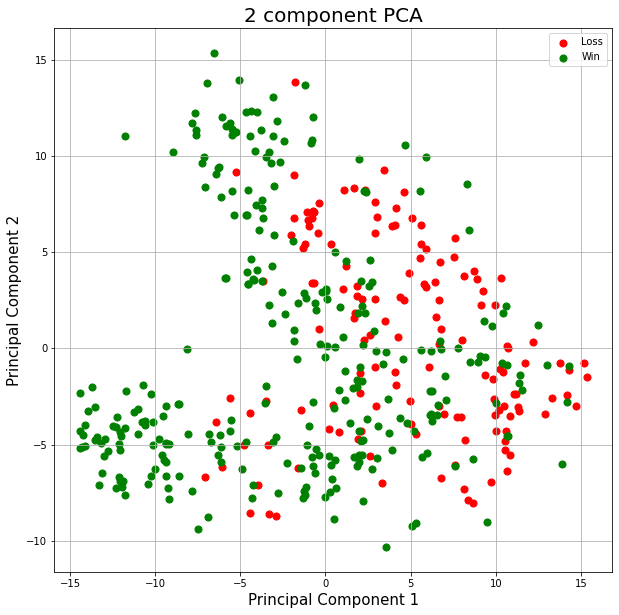

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win/Loss'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Loss', 'Win'])
ax.grid()

# 3 Component PCA Vsiualization

In [ ]:
finalDf

,principal component 1,principal component 2,Win/Loss
0,-6.835762,-4.436498,1
1,1.164918,-2.684238,1
2,12.453967,1.208096,1
3,14.278010,-0.910511,1
4,2.123071,2.191058,1
...,...,...,...
425,6.963248,-3.396128,0
426,-5.604884,-2.559798,0
427,-4.454068,-3.373742,0
428,2.625402,-5.614269,0


In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(StandardizedData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

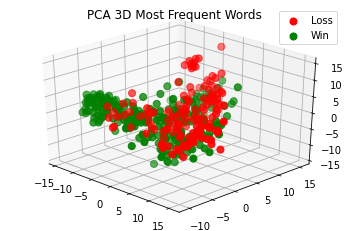

In [ ]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win/Loss'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Loss', 'Win'])
ax.view_init(30, 315)
ax.set_title('PCA 3D Most Frequent Words')
plt.show()


Try fixing PCA 

In [ ]:
mostFreqMatrixWord.shape

(430, 1001)

In [ ]:
newDf = mostFreqMatrixWord.drop(['Win/Loss'], axis=1)
newDf.shape

(430, 1000)

In [ ]:
TargetDf.shape

(430, 2)

In [ ]:
newDf

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,promised_VBD,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000398,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.000000,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000000,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.00013

# Screen Plot

## PCA with deception words

In [ ]:
# Standardizing the features
StandardizedData = StandardScaler().fit_transform(df2.drop(['Win/Loss'], axis=1))
#type(StandardizedData)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(StandardizedData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
# Check the if Win/Loss Attribute is fitted in the right order 
finalDf = pd.concat([principalDf, df1[['Win/Loss']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,Win/Loss
0,3.407457,-1.421775,2.234396,1
1,3.204264,2.959023,-0.202539,1
2,-2.992847,0.485711,0.192920,1
3,-3.254308,0.010245,-0.827043,1
4,6.099776,2.039933,-4.070149,1
...,...,...,...,...
425,-1.256155,2.172073,1.039885,0
426,14.533393,-1.893595,1.672470,0
427,11.738575,-0.883778,2.845416,0
428,12.639221,2.691018,1.683859,0


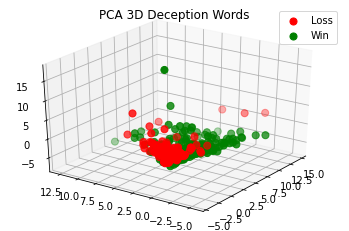

In [ ]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win/Loss'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Loss', 'Win'])
ax.set_title('PCA 3D Deception Words')
ax.view_init(30, 215)
plt.show()

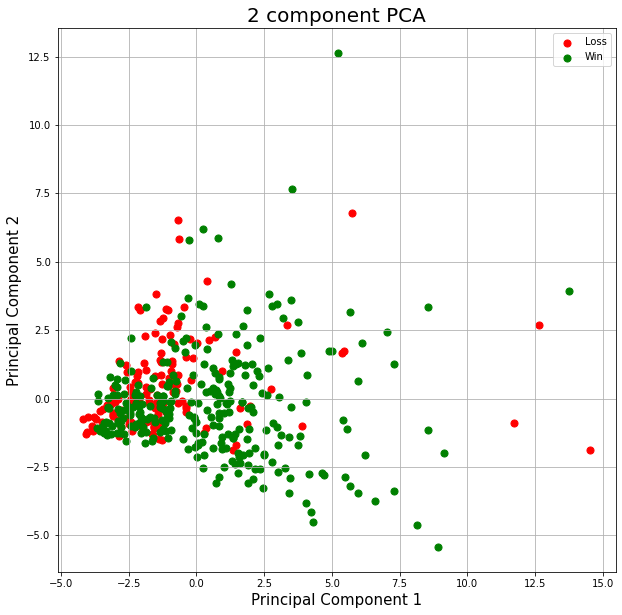

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win/Loss'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Loss', 'Win'])
ax.grid()

# K Means clustering

In [ ]:
finalDf

,principal component 1,principal component 2,principal component 3,Win/Loss
0,3.407457,-1.421775,2.234396,1
1,3.204264,2.959023,-0.202539,1
2,-2.992847,0.485711,0.192920,1
3,-3.254308,0.010245,-0.827043,1
4,6.099776,2.039933,-4.070149,1
...,...,...,...,...
425,-1.256155,2.172073,1.039885,0
426,14.533393,-1.893595,1.672470,0
427,11.738575,-0.883778,2.845416,0
428,12.639221,2.691018,1.683859,0


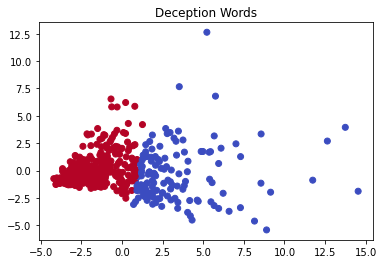

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Fit K-means with Scikit


kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(finalDf)

# Predict the cluster for all the samples
P = kmeans.predict(finalDf)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=colors, marker="o", picker=True)
plt.title('Deception Words')
plt.show()

In [ ]:
finalDf

,principal component 1,principal component 2,Win/Loss
0,-6.835727,-4.436580,1
1,1.164913,-2.684088,1
2,12.453955,1.208453,1
3,14.278011,-0.910326,1
4,2.123073,2.191350,1
...,...,...,...
425,6.963250,-3.396197,0
426,-5.604860,-2.559880,0
427,-4.454048,-3.373979,0
428,2.625428,-5.614308,0


In [ ]:
df = finalDf.drop(['Win/Loss'], axis=1)
df

,principal component 1,principal component 2
0,-6.835727,-4.436580
1,1.164913,-2.684088
2,12.453955,1.208453
3,14.278011,-0.910326
4,2.123073,2.191350
...,...,...
425,6.963250,-3.396197
426,-5.604860,-2.559880
427,-4.454048,-3.373979
428,2.625428,-5.614308


In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
finalDf['DBSCAN_labels']=dbscan.labels_ 

In [ ]:
finalDf.head(50)

,principal component 1,principal component 2,Win/Loss,DBSCAN_labels
0,-6.835727,-4.436580,1,-1
1,1.164913,-2.684088,1,-1
2,12.453955,1.208453,1,-1
3,14.278011,-0.910326,1,-1
4,2.123073,2.191350,1,4
5,2.176979,0.163015,1,-1
6,3.354143,-0.833159,1,-1
7,0.821275,-2.154172,1,-1
8,-2.881616,-4.587962,1,-1
9,-6.118962,-5.117413,1,-1


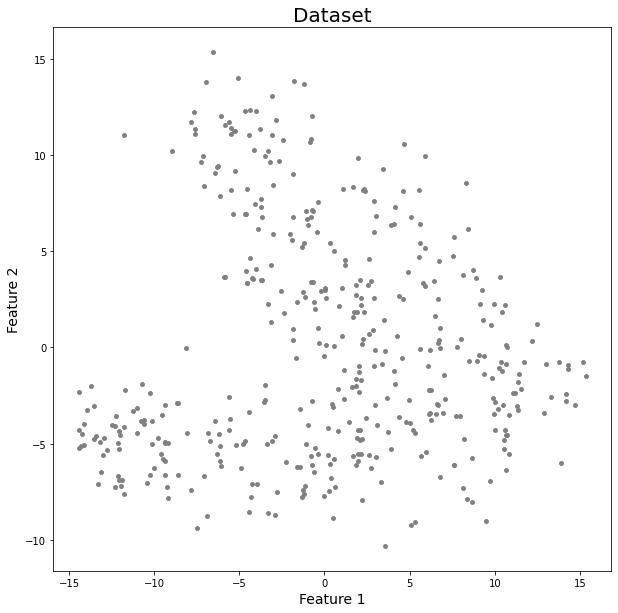

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['principal component 1'],df['principal component 2'],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
df

,principal component 1,principal component 2
0,-6.835727,-4.436580
1,1.164913,-2.684088
2,12.453955,1.208453
3,14.278011,-0.910326
4,2.123073,2.191350
...,...,...
425,6.963250,-3.396197
426,-5.604860,-2.559880
427,-4.454048,-3.373979
428,2.625428,-5.614308


In [ ]:
#df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
#plt.figure(figsize=(10,10))
#plt.scatter(df['principal component 1'],df['principal component 2'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
#plt.title('DBSCAN Clustering',fontsize=20)
#plt.xlabel('Feature 1',fontsize=14)
#plt.ylabel('Feature 2',fontsize=14)
#plt.show()

In [ ]:
#import matplotlib.pyplot as plt 
#from sklearn.cluster import DBSCAN 


# Numpy array of all the cluster labels assigned to each data point 
#db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(finalDf) 
#labels = db_default.labels_ 
#X_principal = finalDf

In [ ]:
finalDf

,principal component 1,principal component 2,Win/Loss,DBSCAN_labels
0,-6.835727,-4.436580,1,-1
1,1.164913,-2.684088,1,-1
2,12.453955,1.208453,1,-1
3,14.278011,-0.910326,1,-1
4,2.123073,2.191350,1,4
...,...,...,...,...
425,6.963250,-3.396197,0,7
426,-5.604860,-2.559880,0,-1
427,-4.454048,-3.373979,0,-1
428,2.625428,-5.614308,0,2


# Support Vector Machine with PCA 

In [342]:
from numpy import mean
from numpy import std
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def get_models():
    models = dict()
    for i in range(1,101):
        steps = [('pca', PCA(n_components=i, svd_solver = "auto")), ('m', SVC(kernel="rbf", C=13, gamma='scale'))]
        models[str(i)] = Pipeline(steps=steps)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, newDf, TargetDf['Win/Loss'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, newDf, TargetDf['Win/Loss'])
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.716 (0.055)
>2 0.712 (0.050)
>3 0.755 (0.065)
>4 0.787 (0.064)
>5 0.821 (0.059)
>6 0.823 (0.062)
>7 0.822 (0.063)
>8 0.825 (0.058)
>9 0.819 (0.060)
>10 0.833 (0.057)
>11 0.851 (0.067)
>12 0.865 (0.062)
>13 0.868 (0.055)
>14 0.874 (0.046)
>15 0.879 (0.056)
>16 0.877 (0.053)
>17 0.878 (0.051)
>18 0.869 (0.056)
>19 0.874 (0.049)
>20 0.870 (0.044)
>21 0.867 (0.040)
>22 0.867 (0.042)
>23 0.872 (0.037)
>24 0.869 (0.033)
>25 0.873 (0.040)
>26 0.872 (0.045)
>27 0.878 (0.039)
>28 0.882 (0.042)
>29 0.881 (0.045)
>30 0.878 (0.046)
>31 0.884 (0.055)
>32 0.889 (0.049)
>33 0.902 (0.050)
>34 0.905 (0.049)
>35 0.907 (0.050)
>36 0.903 (0.044)
>37 0.908 (0.049)
>38 0.910 (0.044)
>39 0.912 (0.049)
>40 0.909 (0.045)
>41 0.916 (0.044)
>42 0.913 (0.043)
>43 0.919 (0.044)
>44 0.919 (0.041)
>45 0.914 (0.039)
>46 0.917 (0.043)
>47 0.916 (0.040)
>48 0.914 (0.038)
>49 0.917 (0.037)
>50 0.918 (0.036)
>51 0.919 (0.036)
>52 0.916 (0.035)
>53 0.918 (0.038)
>54 0.918 (0.036)
>55 0.916 (0.038)
>56 0.918 (0.034)
>

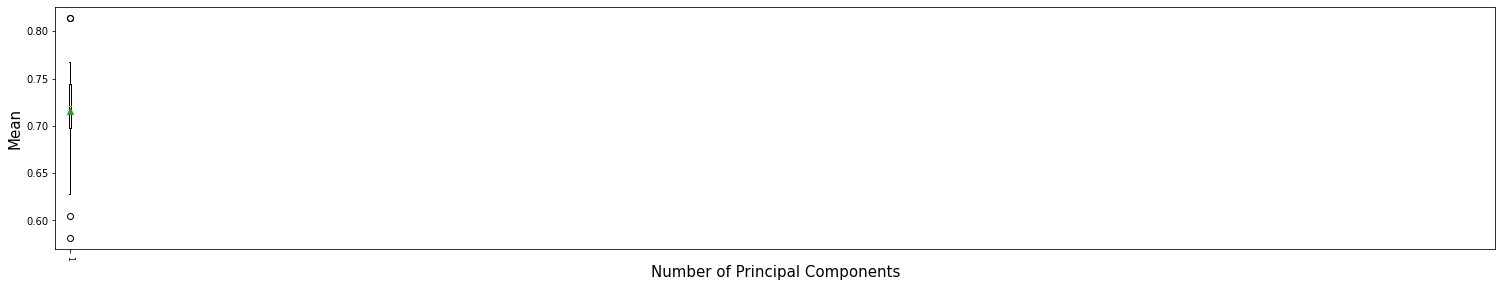

In [ ]:
leftmargin = 0.5 #inches
rightmargin = 0.3 #inches
categorysize = 0.1 # inches

figwidth = leftmargin + rightmargin + (200)*categorysize

fig, ax = plt.subplots(figsize=(figwidth, 4))
fig.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth,
                    top=0.94, bottom=0.1)

ax.boxplot(results, labels=names, showmeans=True)
ax.set_xlim(0,100)
plt.xticks(rotation=270)
ax.tick_params(axis='x', which='major', labelsize=7.5)
ax.set_xlabel('Number of Principal Components', fontsize = 15)
ax.set_ylabel('Mean', fontsize = 15)

plt.show()

In [ ]:

# Check the if Win/Loss Attribute is fitted in the right order 
newDf = mostFreqMatrixWord.to_numpy()
finalDf2 = pd.concat([mostFreqMatrixWord])
finalDf2.head

<bound method NDFrame.head of        the_AT    and_CC     to_TO  ...  outstanding_JJ  streets_NNS  Win/Loss
0    0.040797  0.031784  0.023482  ...             0.0     0.000000         1
1    0.037022  0.033041  0.016919  ...             0.0     0.000398         1
2    0.053289  0.037926  0.018243  ...             0.0     0.000000         1
3    0.051535  0.029605  0.012061  ...             0.0     0.000000         1
4    0.049890  0.029156  0.027472  ...             0.0     0.000000         1
..        ...       ...       ...  ...             ...          ...       ...
425  0.049268  0.039281  0.017643  ...             0.0     0.000000         0
426  0.042038  0.026396  0.022485  ...             0.0     0.000000         0
427  0.036674  0.026976  0.026530  ...             0.0     0.000000         0
428  0.041244  0.031104  0.028569  ...             0.0     0.000293         0
429  0.051724  0.053050  0.022546  ...             0.0     0.000000         0

[430 rows x 1001 columns]>

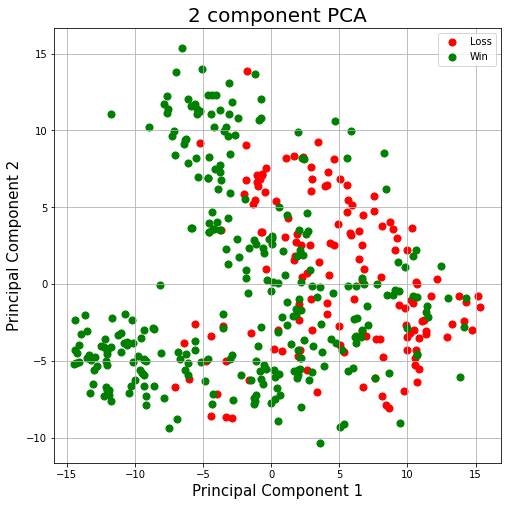

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win/Loss'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Loss', 'Win'])
ax.grid()

**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 1000 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [ ]:
pca.explained_variance_ratio_

array([0.05101629, 0.034294  , 0.02148394])

It shows that Component 1 has  5% Variance, and Component 2has  3% Variance

# Singular value decomposition
 Look for directions with maximal variation, discard directions with little variation.

In [ ]:
df1.head()

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS,Win/Loss
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.00000,0.0,0.0,0.0,0.000474,0.0,0.000237,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000237,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000237,0.0,0.000000,1
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000000,0.00000,0.0,0.0,0.0,0.000597,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.000199,0.000199,0.000398,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000199,0.000199,0.000000,0.0,0.0,0.000199,0.0,0.0,0.000000,0.0,0.000398,1
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00096,0.000000,0.00048,0.0,0.0,0.000480,0.000000,0.000000,0.0,0.00048,0.000960,0.0,0.0,0.0,0.0,0.0,0.00048,0.000000,0.000000,0.000480,0.0,0.0,0.000000,0.0,0.0,0.000480,0.0,0.000000,1
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.001097,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.001097,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.002193,0.0,0.0,0.001097,0.0,0.0,0.000000,0.0,0.000000,1
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000130,0.00013,0.0,0.0,0.0,0.000000,0.0,0.000518,0.0,0.000389,0.0,0.00000,0.000259,0.00000,0.0,0.0,0.000000,0.000259,0.000130,0.0,0.00000,0.000259,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000389,0.0,0.000000,1


# Predictors

## Neural Networks without K Fold

In [330]:
from sklearn.neural_network import MLPClassifier

# Initiated Neurel Network
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Fit the model using training set
mlp.fit(train.iloc[:, train.columns != 'Win/Loss'], train['Win/Loss'])

# Predicted the learner using the test data set
predictions = mlp.predict(test.iloc[:, test.columns != 'Win/Loss'])

# Checked the scorer
mlp.score(test.iloc[:, test.columns != 'Win/Loss'], test['Win/Loss'])


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6976744186046512

## Support Vector Machine

Train Split

In [335]:
from sklearn.model_selection import train_test_split
train_PCA, test_PCA = train_test_split(finalDf, test_size=0.2)
print(train_PCA)

     principal component 1  ...  Win/Loss
335               0.629845  ...         1
429              -2.873562  ...         0
305               3.530056  ...         1
331               0.396469  ...         1
261              -2.801656  ...         1
..                     ...  ...       ...
397               0.836944  ...         1
295               0.673096  ...         1
76                0.931524  ...         1
157              -0.254754  ...         0
16               -1.593757  ...         1

[344 rows x 4 columns]


Support Vector Machien with Default Dataframe

In [334]:
from sklearn import svm

predictor = svm.SVC()
predictor.fit(train.iloc[:, train.columns != 'Win/Loss'], train['Win/Loss'])
predictions = predictor.predict(test.iloc[:, test.columns != 'Win/Loss'])

# Checked the scorer
predictor.score(test.iloc[:, test.columns != 'Win/Loss'], test['Win/Loss'])


0.6046511627906976

Support Vector Machine with PCA DF

In [333]:
from sklearn import svm

predictor = svm.SVC()
predictor.fit(train_PCA.iloc[:, train_PCA.columns != 'Win/Loss'], train['Win/Loss'])
predictions = predictor.predict(test_PCA.iloc[:, test_PCA.columns != 'Win/Loss'])

# Checked the scorer
predictor.score(test_PCA.iloc[:, test_PCA.columns != 'Win/Loss'], test_PCA['Win/Loss'])


0.6627906976744186

# Random Forest PCA with K Fold Validation



In [ ]:
dfRandomForest = mostFreqMatrixWord.drop(['Win/Loss'], axis=1)
dfRandomForest
dfTargetRN = mostFreqMatrixWord['Win/Loss']

In [ ]:
from numpy import mean
from numpy import std
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def get_models_RN_PCA(predictor, dimensions):
    models = dict()
    for i in range(1,dimensions):
        steps = [('pca', PCA(n_components=i, svd_solver = "auto")), ('m', predictor)]
        models[str(i)] = Pipeline(steps=steps)
    return models

def evaluate_model_RN_PCA(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, dfRandomForest, dfTargetRN, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models_RN_PCA(RandomForestClassifier(), 2)
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN_PCA(model, dfRandomForest, dfTargetRN)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.605 (0.070)


In [ ]:
dfRandomForest

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,promised_VBD,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000398,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.000000,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000000,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.00013

# Random Forest with Default

In [ ]:
from numpy import mean
from numpy import std
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def get_models_RN(predictor):
    models = dict()
    steps = [('m', predictor )]
    models[str(1)] = Pipeline(steps=steps)
    return models

def evaluate_model_RN(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, dfRandomForest, dfTargetRN, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models_RN(RandomForestClassifier())
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, dfRandomForest, dfTargetRN)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.899 (0.049)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, )
rf.fit(dfRandomForest, dfTargetRN)
#sorted_idx = rf.feature_importances_.argsort()
#sorted_idx = sorted_idx
#fig = plt.figure()
#figsize = plt.subplots(figsize = (12, 300))
#plt.barh(mostFreqWordList, rf.feature_importances_[sorted_idx])




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# XGBoosting with Default

In [ ]:
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from xgboost import plot_importance


In [ ]:
dfRandomForest

,the_AT,and_CC,to_TO,of_IN,a_AT,in_IN,we_PPSS,i_PPSS,for_IN,is_BEZ,our_PP$,to_IN,that_CS,this_DT,have_HV,are_BER,will_MD,you_PPSS,on_IN,that_WPS,but_CC,be_BE,with_IN,they_PPSS,it_PPS,who_WPS,people_NNS,all_ABN,their_PP$,as_CS,you_PPO,can_MD,what_WDT,that_DT,it_PPO,do_DO,or_CC,america_NP,when_WRB,by_IN,...,promised_VBD,used_VBN,character_NN,uniform_NN,remind_VB,tuition_NN,father_NN,happens_VBZ,30_CD,infrastructure_NN,available_JJ,retirement_NN,south_JJ,agree_VB,terrorist_JJ,process_NN,ability_NN,liberty_NN,hands_NNS,losing_VBG,prevent_VB,leader_NN,institutions_NNS,legislation_NN,_VBZ,profits_NNS,wealthy_JJ,homeowners_NNS,republican_JJ,road_NN,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.040797,0.031784,0.023482,0.016603,0.022770,0.022533,0.010199,0.011860,0.010199,0.008776,0.001660,0.006404,0.005693,0.006404,0.008539,0.004507,0.002372,0.016129,0.004981,0.003321,0.005930,0.005930,0.006167,0.006641,0.003083,0.003558,0.011148,0.003083,0.004032,0.001423,0.005455,0.003558,0.008539,0.003558,0.007827,0.006404,0.002846,0.001423,0.002372,0.004507,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000474,0.000000,0.000237,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000237,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
1,0.037022,0.033041,0.016919,0.018113,0.019904,0.016322,0.013734,0.017914,0.007166,0.009355,0.012540,0.008161,0.005971,0.005772,0.006569,0.006369,0.004976,0.005971,0.004976,0.002986,0.008161,0.004777,0.005374,0.002986,0.004379,0.002986,0.005772,0.005374,0.002388,0.002787,0.002787,0.005772,0.003185,0.003384,0.006369,0.005971,0.003384,0.007564,0.002787,0.002190,...,0.000398,0.000000,0.00000,0.0,0.000000,0.0,0.000597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000199,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
2,0.053289,0.037926,0.018243,0.024964,0.015362,0.027844,0.012962,0.002880,0.009122,0.007201,0.017283,0.013442,0.004321,0.009122,0.003360,0.004321,0.008161,0.000480,0.002880,0.003360,0.003360,0.003360,0.006721,0.003360,0.003360,0.003360,0.000960,0.002880,0.002400,0.006241,0.000000,0.002880,0.000480,0.002880,0.000960,0.001920,0.002400,0.000960,0.002880,0.002400,...,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000960,0.000000,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000480,0.000960,0.000000,0.0,0.0,0.000000,0.0,0.000480,0.000000,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
3,0.051535,0.029605,0.012061,0.026316,0.025219,0.020833,0.002193,0.010965,0.006579,0.006579,0.008772,0.013158,0.004386,0.005483,0.002193,0.004386,0.002193,0.000000,0.007675,0.004386,0.007675,0.003290,0.003290,0.000000,0.008772,0.000000,0.005483,0.000000,0.004386,0.004386,0.000000,0.003290,0.001097,0.002193,0.001097,0.001097,0.000000,0.000000,0.003290,0.006579,...,0.000000,0.001097,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
4,0.049890,0.029156,0.027472,0.023196,0.015550,0.018660,0.020086,0.013477,0.012310,0.007386,0.013218,0.010755,0.009071,0.011922,0.006738,0.003240,0.009848,0.002203,0.006479,0.003887,0.005313,0.007386,0.005054,0.003240,0.005831,0.003887,0.005702,0.005442,0.002721,0.007127,0.003369,0.003499,0.002073,0.002203,0.003628,0.004406,0.002462,0.001296,0.000648,0.005442,...,0.000000,0.000130,0.00013,0.0,0.000000,0.0,0.000000,0.000000,0.000518,0.0,0.000389,0.0,0.000000,0.000259,0.000000,0.000000,0.000000,0.000000,0.000259,0.00013

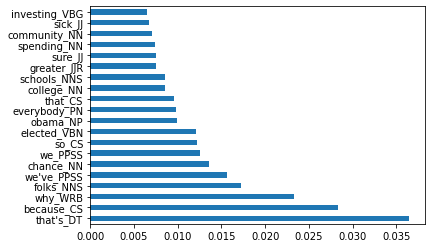

In [ ]:
model = RandomForestClassifier()
model.fit(dfRandomForest, dfTargetRN)
feat_importances = pd.Series(model.feature_importances_, index=dfRandomForest.columns)
feat_importances.nlargest(20).plot(kind='barh')

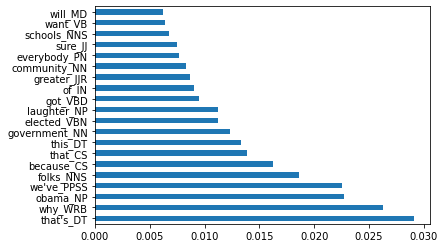

In [ ]:
feat_importances.nlargest(20).plot(kind='barh')

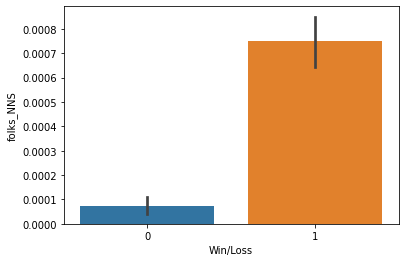

In [ ]:
# Visualizin the data on how often a president using 'but' in their speech.
sns.barplot(x="Win/Loss", y="folks_NNS", data=df1)

In [ ]:
df2

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish,Win/Loss
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


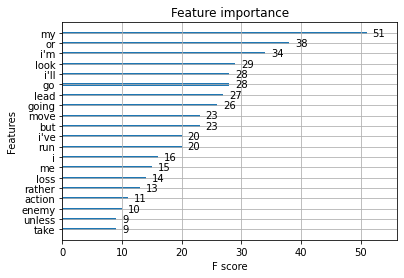

In [ ]:
model = xgb.XGBClassifier()
model.fit(df2.drop(['Win/Loss'],axis=1), df2["Win/Loss"])
#figsize = plt.subplots(figsize = (12, 300))
# plot feature importance
plot_importance(model, max_num_features=20)
pyplot.show()

In [ ]:
df2.shape

(430, 77)

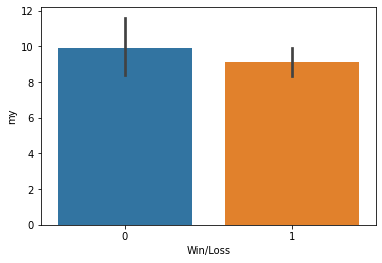

In [ ]:
# Visualizin the data on how often a president using 'but' in their speech.
sns.barplot(x="Win/Loss", y="my", data=df2)

In [ ]:

models = get_models_RN(xgb.XGBClassifier(random_state=42, gamma=0.1))
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, dfRandomForest, dfTargetRN)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.935 (0.037)


In [ ]:
models = get_models_RN(xgb.XGBClassifier(random_state=42, gamma=0.1, min_child_weight = 2))
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, dfRandomForest, dfTargetRN)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# XGBoosting with PCA

In [ ]:
#models = get_models_RN_PCA(xgb.XGBClassifier(random_state=42, gamma=0.1), 10)
#rZesults, names = list(), list()
#for name, model in models.items():
#    scores = evaluate_model_RN_PCA(model, dfRandomForest, dfTargetRN)
#    results.append(scores)
#    names.append(name)
#    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Deception Words Predictor 

In [308]:
df = deceptiondocword.drop(['Win/Loss'], axis=1)
target = deceptiondocword['Win/Loss']


In [312]:
df

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Random Forest with K Fold

In [309]:
models = get_models_RN(RandomForestClassifier())
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, df2, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.888 (0.052)


In [310]:
models = get_models_RN(xgb.XGBClassifier())
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, df, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

KeyboardInterrupt: ignored

SVC

In [322]:
df

,i,but,or,my,going,me,i'm,go,take,i've,look,i'll,without,lead,move,run,i'd,taking,action,fear,walk,goes,unless,rather,bringing,drive,enemy,myself,follow,carry,terrible,moved,loss,however,mine,afraid,nor,although,except,greed,tragedy,hate,driven,disappointed,anger,lies,weak,sorry,arrived,lie,carrying,followed,abandon,crazy,flew,jerk,lonely,hated,arrive,hates,suspicious,besides,inadequate,worthless,arrives,vain,dumb,lied,agony,ignorant,fled,despise,inferior,boring,dislike,anguish
0,50,25,12,6,16,22,10,20,1,0,9,3,1,0,2,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,90,41,17,31,8,15,2,5,6,1,3,2,6,3,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,7,5,5,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,7,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104,41,19,9,10,21,0,7,6,1,3,2,2,1,2,3,2,2,0,1,0,1,5,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28,19,6,2,1,4,2,1,0,5,2,4,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,152,54,18,47,53,13,31,15,16,13,17,17,3,1,1,2,9,7,0,0,0,2,0,4,3,0,0,1,2,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,175,30,20,38,56,18,28,15,9,8,9,12,5,0,0,0,4,7,1,0,0,1,0,3,6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
428,198,57,12,11,54,19,0,20,18,0,24,0,1,4,4,6,0,3,4,0,3,0,1,1,0,0,0,1,1,3,1,0,0,1,1,1,0,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [328]:
models = get_models_RN(SVC(kernel="rbf", C=3.5, gamma='scale'))
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN(model, df, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.909 (0.040)


SVC

In [ ]:
models = get_models_RN_PCA(SVC(kernel="rbf", C=10, gamma='scale'), 2)
rZesults, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_RN_PCA(model, df, target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [321]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)
print(train)

      i  but  or  my  going  ...  inferior  boring  dislike  anguish  Win/Loss
118  15    5   7   2      0  ...         0       0        0        0         0
413  20   12   4   3      3  ...         0       0        0        0         0
74    8    8   1   0      1  ...         0       0        0        0         1
321  10    2   0   0      1  ...         0       0        0        0         1
13   34   25   6   2      1  ...         0       0        0        0         1
..   ..  ...  ..  ..    ...  ...       ...     ...      ...      ...       ...
21   61   22  15  11     13  ...         0       0        0        0         1
7    49   19  11   1      8  ...         0       0        0        0         1
194   9    8   1   0      2  ...         0       0        0        0         1
317  13    4   2   1      3  ...         0       0        0        0         1
215  16    4   4  10      1  ...         0       0        0        0         1

[344 rows x 77 columns]


In [320]:
model = xgb.XGBClassifier(gamma=1, n_estimators=100,max_depth=3)

# Fit the model using training set
model.fit(train.iloc[:, train.columns != 'Win/Loss'], train['Win/Loss'])

# Predicted the learner using the test data set
predictions = model.predict(test.iloc[:, test.columns != 'Win/Loss'])

# Checked the scorer
model.score(test.iloc[:, test.columns != 'Win/Loss'], test['Win/Loss'])



0.7984496124031008

In [ ]:
df1.describe()